# Henry's constant calculations

In this notebook we'll calculate the Henry's constant. First, make sure the data is imported by running the import notebook.

In [1]:
%run import.ipynb

Selected 1 samples
Selected 23 adsorbates
Selected 5 isotherms with nitrogen at 77K
Selected 2 room temperature calorimetry isotherms
Selected 2 isotherms for IAST calculation
Selected 3 isotherms for isosteric heat calculation


### Slope method

The slope method of calculating Henry's fits a linear henry model to the isotherm points. If the model does not fit, it goes to progresivelly lower pressures until it finds a good fit. For data that is very non-linear, this fit might be between p=0 and the first isotherm point.

It is a fast method but can undershoot depending on the dataset.

Calculated K = 55485.96268061736
Starting points: 42
Selected points: 2
Final adjusted root mean square difference: 7.017637656670085e-12


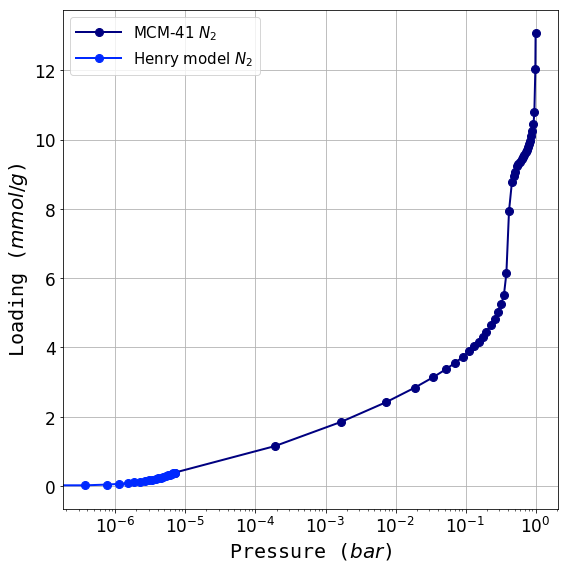

Calculated K = 697654.258413977
Starting points: 91
Selected points: 7
Final adjusted root mean square difference: 0.006097555789632015


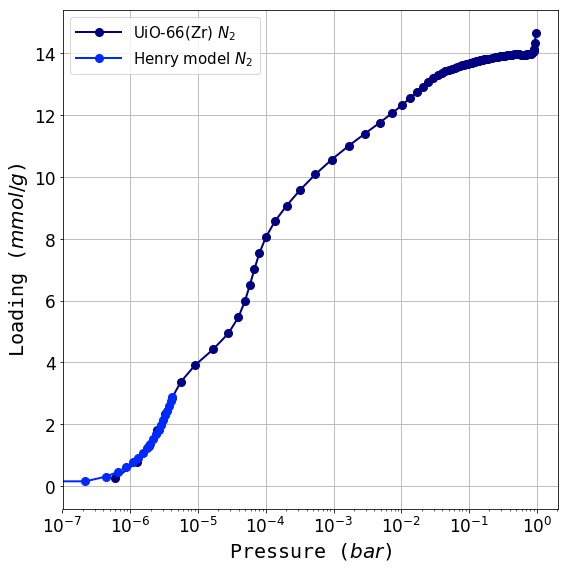

55485.96268061736 697654.258413977


In [2]:
# Slope method
isotherm = next(i for i in isotherms_n2_77k if i.material_name=='MCM-41')
h1 = pygaps.initial_henry_slope(isotherms_n2_77k[0], max_adjrms=0.01, logx=True, verbose=True)

isotherm = next(i for i in isotherms_n2_77k if i.material_name=='UiO-66(Zr)')
h2 = pygaps.initial_henry_slope(isotherms_n2_77k[-1], max_adjrms=0.01, logx=True, verbose=True)

print(h1,h2)

### Virial method

The virial method uses a virial model to fit the data and then obtain the Henry constant from the value of the virial function at n=0.

It is a slower model as a minimisation algorithm must be used. On the other hand, it should obtain a more accurate value for the constant since the model covers the entire dataset.

Attempting to model using Virial
Model Virial success, rmse is [0.84125514]
Virial coefficients: [ -0.02962674   0.55215384  -1.37328352 -14.04620667]
Residuals: [47.41658363]
Rank: 4
Singular values: [1.93908621 0.47289447 0.12667032 0.01643472]
Conditioning threshold: 1.4876988529977098e-14


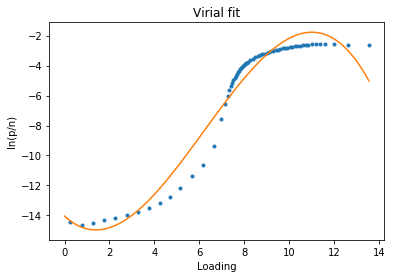

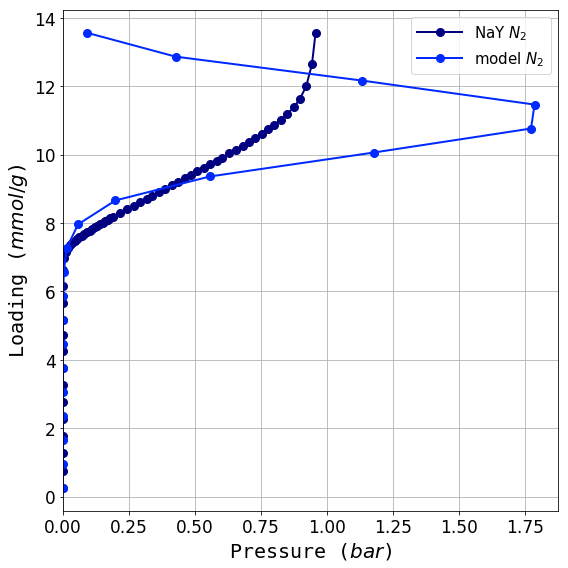

Attempting to model using Virial
Model Virial success, rmse is [0.49400079]
Virial coefficients: [ 8.97089164e-03 -1.27573435e-01  7.76649560e-01 -1.41271317e+01]
Residuals: [21.9633104]
Rank: 4
Singular values: [1.96767055 0.35127069 0.0693576  0.00842801]
Conditioning threshold: 1.9984014443252818e-14


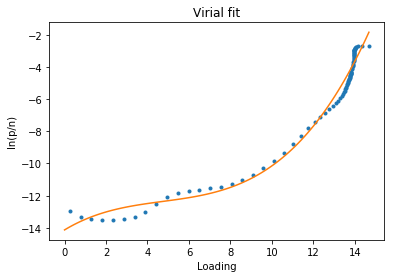

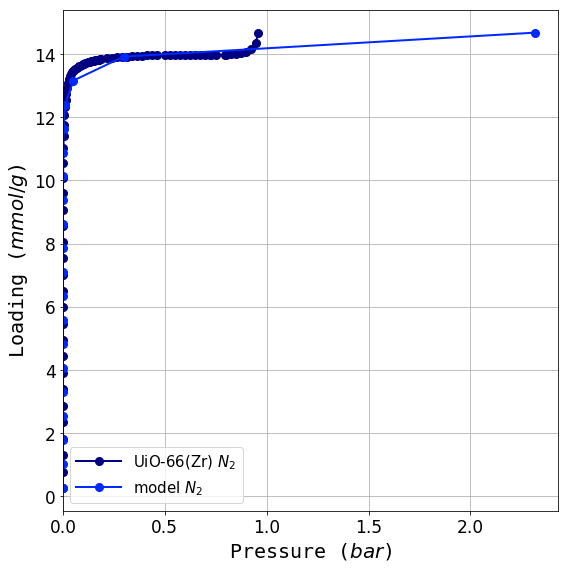

1259476.4388476524 1365637.2297435887


In [3]:
# Virial method
isotherm = next(i for i in isotherms_n2_77k if i.material_name=='MCM-41')
h1 = pygaps.initial_henry_virial(isotherms_n2_77k[1], verbose=True)

isotherm = next(i for i in isotherms_n2_77k if i.material_name=='UiO-66(Zr)')
h2 = pygaps.initial_henry_virial(isotherms_n2_77k[-1], verbose=True)

print(h1,h2)